# Loading the datasets

In [2]:
import pandas as pd
df = pd.read_csv('forestfires.csv')
print(df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


# Applying the preprocessing

In [3]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
print(df.head())

   X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [4]:
df['area'].values[df['area'].values > 0] = 1
df = df.rename(columns={'area': 'label'})
print(df.head())

   X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  label
0  7  5      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0    0.0
1  7  4     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0    0.0
2  7  4     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0    0.0
3  8  6      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2    0.0
4  8  6      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0    0.0


# Applying Logistics regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit(df.drop('label',axis=1))
scaled_features = scaler.transform(df.drop('label',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.008313,0.569860,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,1.008313,-0.244001,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,1.008313,-0.244001,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,1.440925,1.383722,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,1.440925,1.383722,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


In [6]:
X = df_feat
y = df['label']

# Model Evaluation

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn import metrics
model.score(X_train,y_train)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.48717948717948717
Precision: 0.5393258426966292
Recall: 0.5517241379310345


# Cross Validating model and plotting them

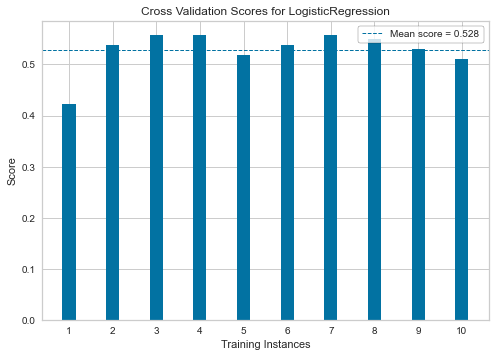

array([0.42307692, 0.53846154, 0.55769231, 0.55769231, 0.51923077,
       0.53846154, 0.55769231, 0.54901961, 0.52941176, 0.50980392])

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import CVScores

def make_cross_validation(model, X, y):
    # prepare the cross-validation procedure
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    visualizer = CVScores(model, cv=cv, scoring='accuracy')
    # Fit the data to the visualizer
    visualizer.fit(X, y)    
    # Display the visualizer
    visualizer.show()
    # Return the scores of the cross validation
    return scores

make_cross_validation(model, X, y)